In [109]:
# import relevant libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

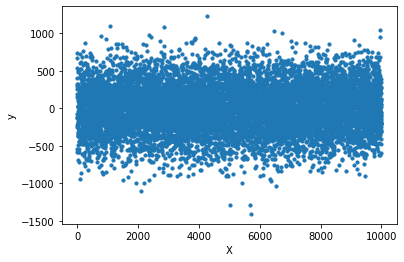

In [110]:
# load data
df_train = pd.read_csv('train.csv')
X = np.arange(len(df_train))[:, np.newaxis].astype(np.float64) # doesn't drop anything
y = pd.DataFrame(df_train['y'])

# plot
plt.scatter(X,y,s=10)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# format X correctly
X = df_train.drop(df_train.columns[[0, 1]], axis=1)

# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

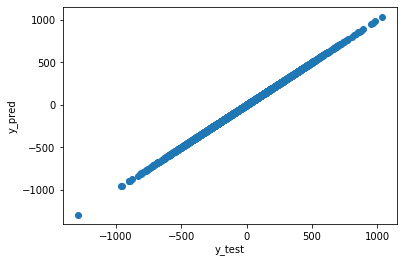

In [111]:
# fit model and predict
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

# calculate RMSE
RMSE = mean_squared_error(y_test, y_pred)**0.5

# plot the error
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [112]:
# load test data

X_sol = pd.read_csv('test.csv')
y_sol = pd.DataFrame()
y_sol['Id'] = X_sol['Id']
X_sol = X_sol.drop(labels='Id', axis=1)

In [113]:
# validate the predictions with the test set

y_sol['y'] = pd.DataFrame(regr.predict(X_sol))

# write the predictions to the submission file

y_sol.to_csv('submission.csv', index=False)